In [3]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np

In [4]:
def I_3a(x):
    return 1/(1 + x*x)

In [5]:
def left_rectangle_method(f, a, b, n):
    h = (b - a) / n
    sum = f(a)
    for i in range(1, n):
        sum += f(a+h*i)
    return sum * h

In [6]:
def right_rectangle_method(f, a, b, n):
    h = (b - a) / n
    sum = f(a + h)
    for i in range(2, n + 1):
        sum += f(a+h*i)
    return sum * h

In [7]:
def trapezoid_method(f, a, b, n):
    h = (b - a) / n
    sum = f(a)/2
    for i in range(2, n):
        sum += f(a + h * i)
    sum += f(b)/2
    return sum * h

In [8]:
def mean_method(f, a, b, n):
    h = (b - a) / n
    sum = f((2*a + h) / 2)
    for i in range(1, n + 1):
        sum += f((a + h*i + h*(i+1) + a) / 2)
    return sum * h

In [9]:
def simpson_method(f, a, b, n):
    if n % 2 == 1: 
        n += 1
        
    integral = f(a) + f(b)
    h = (b - a) / n
    integral = f(a) + f(b) + 4 * sum(f(a + (i + 0.5) * h) for i in range(n)) + 2 * sum(f(a + i * h) for i in range(1, n))
    return h * integral / 6

In [10]:
def check_precision(f, a, b, N, method):
    integral = quad(f, a, b)
    errors = []
    
    for n in range(1,N):
        value_for_estimation = method(f, a, b, n)
        errors.append(np.abs(integral[0] - value_for_estimation))
    return errors

In [11]:
def draw_errors(N, method, f, a, b):
    plt.figure(figsize = (3,3))
    plt.plot(range(1,N), check_precision(f, a, b, N,method))
    plt.grid(True)
    plt.xlim(xmin=1)
    plt.show()

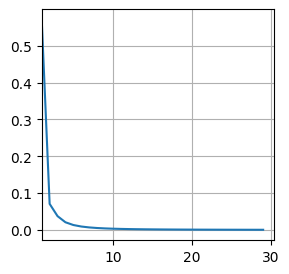

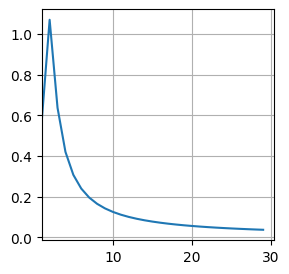

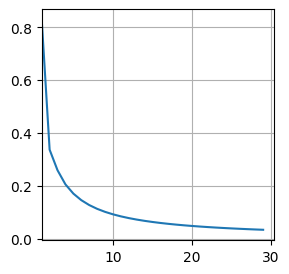

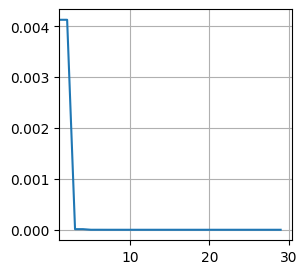

In [12]:
a = -1
b = 1
N = 30

methods = [right_rectangle_method, trapezoid_method, mean_method, simpson_method]

for method in methods:
    draw_errors(N,method, I_3a, a, b)

In [13]:
def erf(x):
    return (2 / np.sqrt(np.pi)) * quad(lambda t: np.exp(-t**2), 0, x)[0]

In [14]:
erf(1)

np.float64(0.8427007929497149)

In [15]:
def simpson_method(f, a, b, n, x):
    if n % 2 == 1: 
        n += 1
        
    integral = f(a,x) + f(b,x)
    h = (b - a) / n
    integral = f(a,x) + f(b,x) + 4 * sum(f(a + (i + 0.5) * h, x) for i in range(n)) + 2 * sum(f(a + i * h, x) for i in range(1, n))
    return h * integral / 6

In [16]:
def erf(x):
    return (2 / np.sqrt(np.pi)) *simpson_method(lambda t,x: np.exp(-t**2), 0, x, 1000000,1)

In [17]:
erf(1)

np.float64(0.8427007929497362)

In [18]:
def simpson_method(f, a, b, n, pp):
    if n % 2 == 1: 
        n += 1
        
    integral = f(a,pp) + f(b,pp)
    h =  np.float64((b - a) / n)
    integral = f(a,pp) + f(b,pp) + 4 * sum(f(a + (i + np.float64(0.5)) * h, pp) for i in range(n)) + 2 * sum(f(a + i * h, pp) for i in range(1, n))
    return h * integral / 6

In [19]:
def f(t,pp):
    return  np.float64((1/np.pi)*np.cos(pp[0] * t - pp[1] * np.sin(t)))


In [20]:
def J(m,x):
    return simpson_method(f, 0, np.pi, 9,(m,x))

In [21]:
def J_derivative(m, x, eps =  np.float64(10e-7)):
    return (J(m,x + eps) - J(m,x - eps))/(2*eps)
    

In [22]:
J_derivative(0,1) + J(1,1)

np.float64(-3.319344799024293e-12)